# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Introduction to Statistics in Python (VII) - Advanced Stats

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

The notebook is based on (source of the notebook):
- https://github.com/rouseguy/intro2stats
- https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

#### A great intro to Linear Regression in stats and in Machine Learning:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

<div class="alert alert-block alert-warning">
📺 READ AT HOME
<br>

[A Beginner’s Guide to Linear Regression in Python with Scikit-Learn](https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html)

</div>

<div class="alert alert-block alert-info">
📺 WATCH AT HOME
<br>

#### The idea of linear regression:
[StatQuest: Fitting a line to data, aka least squares, aka linear regression](https://www.youtube.com/watch?v=PaFPbb66DxQ)

#### Linear regression in Python:
https://www.youtube.com/watch?v=J_LnPL3Qg70

</div>

# Linear Regression

Why use linear regression?

1. Easy to use
2. Easy to interpret
3. Basis for many methods
4. Runs fast
5. Most people have heard about it :-) 

### Libraries in Python for Linear Regression

The two most popular ones are

1. `scikit-learn`
2. `statsmodels`

We highly recommend learning `scikit-learn` since that's also the machine learning package in Python.

## Problem

Could we predict price of weed in a state using the demographic information? 

For this session, let's do this. For January 2015, let's find average price for high quality weed across all the states. Let's assume that we don't know what the prices are for the following states: 
<br>
iowa, kentucky, missouri, nevada, wyoming, south dakota, new jersey, michigan, idaho
<br>

Those are our **test** set. The remaining states are our **train** set. We need to train the model on the train dataset and predict for the test dataset. 

Since we also know the actual mean prices for the test states, let's verify how good our models are.

In [1]:
import pandas as pd

In [5]:
#Load the data
weed_pd = pd.read_csv(r"C:\Users\bartf\Downloads\Data5\Weed_Price.csv", parse_dates=[-1])
demo_pd = pd.read_csv(r"C:\Users\bartf\Downloads\Data5\Demographics_State.csv")

In [6]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [7]:
weed_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

In [8]:
weed_pd.shape

(22899, 8)

In [9]:
demo_pd.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [10]:
demo_pd.dtypes

region                object
total_population       int64
percent_white          int64
percent_black          int64
percent_asian          int64
percent_hispanic       int64
per_capita_income      int64
median_rent            int64
median_age           float64
dtype: object

In [11]:
demo_pd.shape

(51, 9)

As seen above, weed price dataset has states' first alphabet capitalized. 
The below command will convert it to lower case

In [12]:
str.lower("Alabama")

'alabama'

In [13]:
?weed_pd.apply

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Use the `.apply()` function and `lambda` to convert `State` column of `weed_pd` to small letters.

</div>

In [14]:
weed_pd.State = weed_pd.State.apply(lambda x: x.lower())

In [15]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,california,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [16]:
pd.unique(weed_pd.State)

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'pennsylvania', 'rhode island',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'wyoming'], dtype=object)

In [17]:
pd.unique(demo_pd.region)

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire',
       'new jersey', 'new mexico', 'new york', 'north carolina',
       'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'south dakota', 'tennessee',
       'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west virginia', 'wisconsin', 'wyoming'], dtype=object)

In [18]:
len(pd.unique(weed_pd.State))

51

In [19]:
len(pd.unique(demo_pd.region))

51

In [20]:
#Let's get month and year of the date, so that we can select only Jan 2015 data
weed_pd["Month"] = weed_pd["date"].apply(lambda x: x.month)
weed_pd["Year"] = weed_pd["date"].apply(lambda x: x.year)

In [21]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,Month,Year
0,alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,california,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Pick the January 2015 from the `weed_pd`, and create `weed_jan2015_pd`.

</div>

In [22]:
weed_jan2015_pd = weed_pd[(weed_pd.Year == 2015) & (weed_pd.Month == 1)]

In [23]:
weed_jan2015_pd.Month.value_counts()

1    1581
Name: Month, dtype: int64

In [24]:
# group the states by mean HighQ  
weed_jan2015_summarized = weed_jan2015_pd[["State", "HighQ"]].groupby("State").mean().reset_index()

In [25]:
#The source price dataset for our model 
weed_jan2015_summarized.head()

,State,HighQ
0,alabama,336.504839
1,alaska,302.972581
2,arizona,297.782903
3,arkansas,341.705806
4,california,243.602258


In [26]:
weed_jan2015_summarized.shape

(51, 2)

In [27]:
test_states = ["iowa", "kentucky", "missouri", "nevada", "wyoming", \
               "south dakota", "new jersey", "michigan", "idaho" ]

In [28]:
len(test_states)

9

In [29]:
# we merge the two datasets in order to have additional features for our model
data_for_model = pd.merge(weed_jan2015_summarized, demo_pd, left_on="State", right_on="region")

In [30]:
data_for_model.head()

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,336.504839,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,302.972581,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,297.782903,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,341.705806,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,243.602258,california,37659181,40,6,13,38,29527,1119,35.4


<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Create the train and test dataset using a new variable `criterion`, which would be a table of the length of `data_for_model` dataset, which would have booleans True and False, and which you would later use to divide the `data_for_model` into a test set and a train set, using the `test_states` list (take a look at the next cell as a hint for you).

</div>

In [31]:
test_states

['iowa',
 'kentucky',
 'missouri',
 'nevada',
 'wyoming',
 'south dakota',
 'new jersey',
 'michigan',
 'idaho']

In [32]:
data_for_model.State.apply(lambda x: True if x in test_states else False)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
Name: State, dtype: bool

In [33]:
data_for_model.State.apply(lambda x: x in test_states)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
Name: State, dtype: bool

In [34]:
data_for_model.State.isin(test_states)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
Name: State, dtype: bool

In [35]:
criterion = data_for_model.State.isin(test_states)

In [36]:
criterion

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
Name: State, dtype: bool

#### Info: `~` sign (tilde) is a character taking the opposite of a Boolean. Tilde means "not".
So e.g., `~criterion` means `not criterion`.

In [37]:
print("Train data labels: \n", ~criterion, "\n\n", "Test data labels: \n", criterion)

Train data labels: 
 0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15    False
16     True
17    False
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25    False
26     True
27     True
28    False
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41    False
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50    False
Name: State, dtype: bool 

 Test data labels: 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    F

In [38]:
# We divide our `data_for_model` into train and test sets
train = data_for_model[~criterion]
test = data_for_model[criterion]

In [39]:
train.shape, test.shape

((42, 11), (9, 11))

In [40]:
train.head()

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,336.504839,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,302.972581,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,297.782903,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,341.705806,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,243.602258,california,37659181,40,6,13,38,29527,1119,35.4


In [41]:
test.head()

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
12,idaho,274.990323,idaho,1583364,84,1,1,11,22568,607,34.9
15,iowa,364.967742,iowa,3062553,88,3,2,5,27027,534,38.1
17,kentucky,339.014516,kentucky,4361333,86,8,1,3,23462,506,38.2
22,michigan,287.620000,michigan,9886095,76,14,3,5,25681,623,39.1
25,missouri,351.059355,missouri,6007182,81,11,2,4,25649,549,38.0


### Linear regression 

Let's use `statsmodels` for this workshop. 

Linear regression is of the form:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is what we have the predict/independent variable/response variable
- $\beta_0$ is the intercept/slope
- $\beta_1$ is the coefficient for $x_1$ (the first feature/dependent variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/dependent variable)

The $\beta$ are called *model coefficients*

The model coefficients are estimated in this process. (In Machine Learning parlance - the weights are learned using the algorithm). The function used by us is least squares method. 
<br>

**Least Squares Method** : To identify the weights so that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation. [Wiki](https://en.wikipedia.org/wiki/Least_squares)

![LSM](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/the-method-of-least-squares/_jcr_content/par/styledcontainer_2069/par/lightbox_4392/lightboxImage.img.png/1548702854533.png)

![LSM2](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/11/least-squares-regression-line.jpg)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [43]:
# # You can change the global parameters of the presented plots if you run the following code

# plt.rcParams['figure.figsize'] = (10, 6)
# plt.rcParams['font.size'] = 14

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Please visualise "percent_white" and "HighQ" using `regplot` (regression plot) from Seaborn library.
<br><br>What does the result mean?

</div>

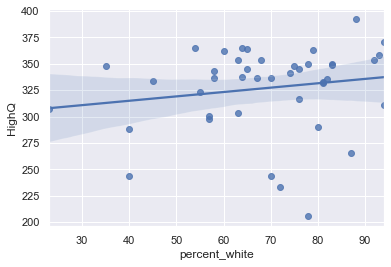

In [44]:
sns.regplot(x='percent_white', y='HighQ', data=train)

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Please visualise "total_population" and "HighQ" using `regplot` (regression plot) from Seaborn library.

</div>

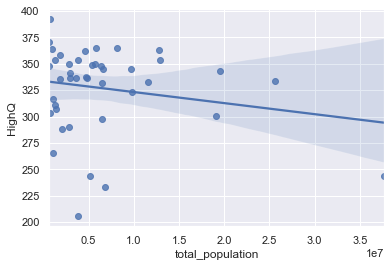

In [45]:
sns.regplot(x='total_population', y='HighQ', data=train)

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Please visualise "per_capita_income" and "HighQ" using `regplot` (regression plot) from Seaborn library.

</div>

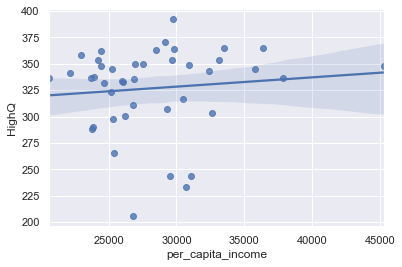

In [46]:
sns.regplot(x='per_capita_income', y='HighQ', data=train)

## **Fitting another kind of plot/model**

In [47]:
?sns.lmplot

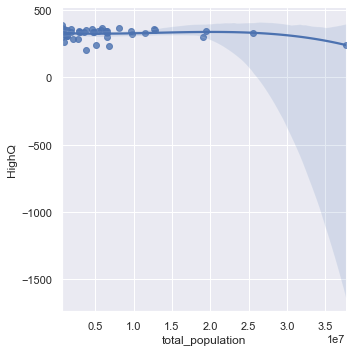

In [48]:
sns.lmplot(x="total_population", y="HighQ", data=train, order=3)

### More plots.

#### Visualizing correlation matrix using a heatmap

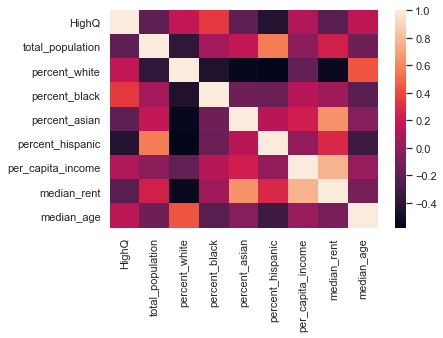

In [49]:
sns.heatmap(train.corr())

In [50]:
?sns.pairplot

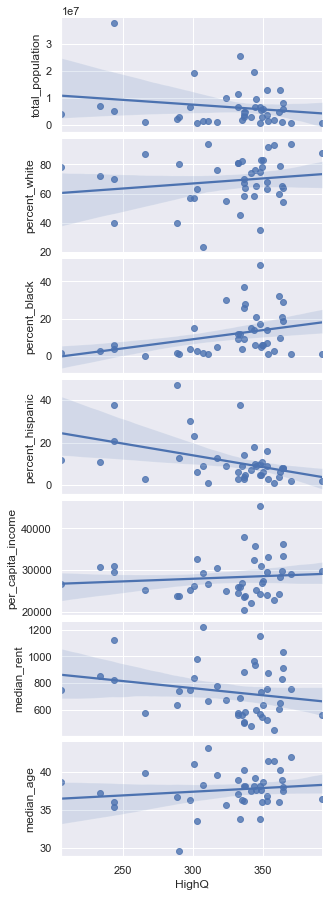

In [51]:
#Multiple scatter plot
my_plot = sns.pairplot(train, x_vars='HighQ', y_vars=['total_population', 'percent_white', 'percent_black', 'percent_hispanic', \
                                           'per_capita_income', 'median_rent', 'median_age'], kind='reg')

my_plot.fig.set_size_inches(5,12)

# **Let's build a single variable model.**

Let's try to estimate price as a function of population

In [52]:
feature_columns = ["total_population"]
train_x = train[feature_columns]
train_y = train['HighQ']

In [53]:
train.shape

(42, 11)

In [54]:
train_y

0     336.504839
1     302.972581
2     297.782903
3     341.705806
4     243.602258
5     243.273226
6     336.442258
7     363.908387
8     348.107097
9     300.604194
10    323.562581
11    306.979677
13    353.133226
14    332.059677
16    349.559032
18    361.621290
19    310.723548
20    364.671935
21    344.880323
23    349.167097
24    336.288065
26    265.517097
27    335.264839
29    353.643548
31    288.175161
32    343.555161
33    344.903871
34    392.652581
35    332.440323
36    353.359677
37    205.483226
38    362.544194
39    317.085806
40    337.197419
42    347.931613
43    333.814194
44    289.862258
45    370.526452
46    364.769032
47    233.028387
48    358.037742
49    349.942903
Name: HighQ, dtype: float64

In [63]:
model_1 = LinearRegression()
model_1.fit(train_x, train_y)

LinearRegression()

In [56]:
print(model_1.intercept_)
print(model_1.coef_)

333.66207941820943
[-1.04692952e-06]


**Let's use the model for prediction**

In [65]:
model_1_predict = model_1.predict(test[feature_columns])

In [66]:
model_1_predict = pd.DataFrame({'States': test.State, 'Actual Price': test.HighQ, 'Predicted Price': model_1_predict})

In [67]:
model_1_predict

,States,Actual Price,Predicted Price
12,idaho,274.990323,332.004409
15,iowa,364.967742,330.455802
17,kentucky,339.014516,329.096071
22,michigan,287.620000,323.312035
25,missouri,351.059355,327.372983
28,nevada,265.610968,330.803893
30,new jersey,345.144839,324.415173
41,south dakota,357.954516,332.798155
50,wyoming,320.450968,333.065189


In [68]:
model_1_predict.columns

Index(['States', 'Actual Price', 'Predicted Price'], dtype='object')

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Use two pointplots to produce a plot of the `Actual Price` and the `Predicted Price` across `States`.

</div>

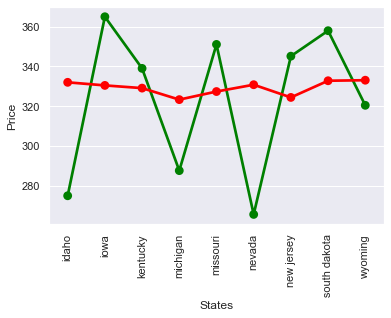

In [69]:
sns.pointplot(x='States', y='Actual Price', data=model_1_predict, color='green')
my_plot = sns.pointplot(x='States',y='Predicted Price',data=model_1_predict, color='red')
plt.ylabel('Price')
my_plot.set_xticklabels(labels=model_1_predict.States, rotation=90);

**Computing mean squared error**

In [70]:
#Root Mean square error on test dataset
np.sqrt(np.mean(np.square(model_1_predict['Actual Price'] - \
                         model_1_predict['Predicted Price'])))

36.28103071032375

In [71]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(model_1_predict['Actual Price'], model_1_predict['Predicted Price']))

36.28103071032375

**The lower the RMSE, the better the model **

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Create model using `total_population` and `per_capita_income` as the features. Report RMSE

</div>

In [72]:
feature_columns = ["total_population", "per_capita_income"]
train_x = train[feature_columns]
train_y = train['HighQ']

model_2 = LinearRegression()
model_2.fit(train_x, train_y)
model_2_predict = model_2.predict(test[feature_columns])
model_2_predict = pd.DataFrame({'States': test.State, 'Actual Price': test.HighQ, 'Predicted Price': model_2_predict})
np.sqrt(mean_squared_error(model_2_predict['Actual Price'],model_2_predict['Predicted Price']))

35.21188413061851

In [73]:
print(model_2.intercept_)
print(model_2.coef_)

309.7736396880503
[-1.03409850e-06  8.40807113e-04]


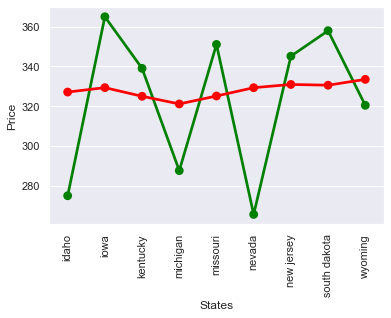

In [74]:
sns.pointplot(x='States', y='Actual Price', data=model_2_predict, color='green')
my_plot = sns.pointplot(x='States',y='Predicted Price',data=model_2_predict, color='red')
plt.ylabel('Price')
my_plot.set_xticklabels(labels=model_2_predict.States, rotation=90);

---

### model 3

In [75]:
feature_columns = ["percent_black", "percent_hispanic"]
train_x = train[feature_columns]
train_y = train['HighQ']

model_2 = LinearRegression()
model_2.fit(train_x, train_y)
model_2_predict = model_2.predict(test[feature_columns])
model_2_predict = pd.DataFrame({'States': test.State, 'Actual Price': test.HighQ, 'Predicted Price': model_2_predict})
np.sqrt(mean_squared_error(model_2_predict['Actual Price'],model_2_predict['Predicted Price']))

31.028146963417882

In [76]:
print(model_2.intercept_)
print(model_2.coef_)

331.9461420576494
[ 0.98801905 -1.50334304]


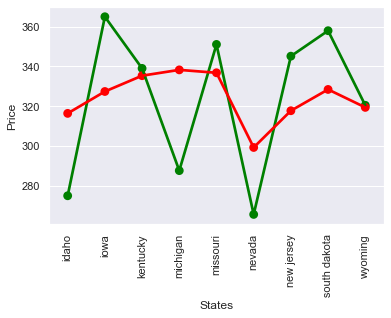

In [77]:
sns.pointplot(x='States', y='Actual Price', data=model_2_predict, color='green')
my_plot = sns.pointplot(x='States',y='Predicted Price',data=model_2_predict, color='red')
plt.ylabel('Price')
my_plot.set_xticklabels(labels=model_2_predict.States, rotation=90);

### Parameters and mending the model

To build the model the right way, the following need to be done. We will do it next time.

1. Scale the features
2. Use cross-validation
3. As more features are added, the model becomes complicated and would overfit the data. Will need regularization
4. Try feature transformation to see if lower RMSE is possible. 

# Randomizing data split
Above we have created a training and testing set manually. This is not optimal. We will split the dataset automatically, taking 75% of rows as training data, and 25% as testing data.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [79]:
feature_columns = ["total_population"]
target_column = ['HighQ']

X = data_for_model[feature_columns]
y = data_for_model[target_column]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Training the model

In [81]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

The regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [82]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
total_population,-0.000001


The above means that for one unit increase in `total_population`, there is an increase of 2.539217e-07 units in `HighQ`. <br>
**The higher the coefficient the better.** Here it's VERY small.

Now let's do prediction on test data.

In [83]:
y_pred = regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [84]:
df = pd.DataFrame({'Actual': y_test.values[:,0], 'Predicted': y_pred[:,0]}, index=range(len(y_test)))
df

,Actual,Predicted
0,353.643548,332.678208
1,306.979677,332.616230
2,323.562581,323.465846
3,287.620000,323.383741
4,297.782903,327.079420
5,265.610968,331.147493
6,370.526452,333.430351
7,343.555161,312.967424


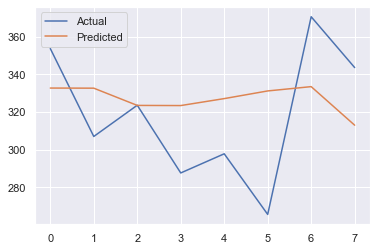

In [85]:
df.plot()

Let's plot our straight line (regression model) with the test data :

Text(0, 0.5, 'y_test')

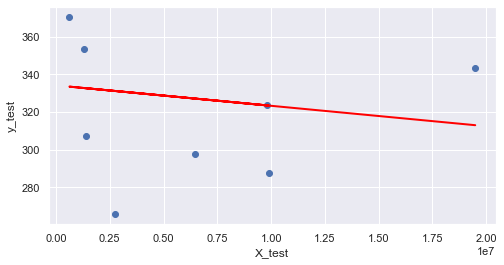

In [86]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X_test')
plt.ylabel('y_test')

In [87]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 35.07293332448968


In [88]:
df.describe()

,Actual,Predicted
count,8.000000,8.000000
mean,318.660161,327.096089
std,35.672611,7.017818
min,265.610968,312.967424
25%,295.242177,323.445319
50%,315.271129,329.113456
75%,346.077258,332.631724
max,370.526452,333.430351


In [89]:
df.Predicted.mean()

327.09608898746166

In [90]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / df.Predicted.mean()

0.10722516870519387

You can see that the value of root mean squared error is 42.97, which is more than 10% of the mean value of the `Predicted` mean is 330.55. This means that our algorithm was not very accurate. We will calculate the accuracy below.

# **R-square** and **p-value** 

- Linear models rely upon a lot of assumptions ([here](http://www.insightsbot.com/assumptions-of-linear-regression-with-python/)). If assumptions are violated, the diagnostics obtained from the model cannot be relied. 
- Biggest challenge is that adding any feature will increase the R-square. One way to counter this is to use adjusted R-squre.
- Take a step back and think - why do we need to report those numbers? We want some estimate of generalization. Cross-validation score provides a general framework for reporting generalization. And this will hold good across all models. And thus, multiple models can be compared. This is the machine learning approach and is widely used in practice.

#### We will use the statsmodels formula to calculate how well our model is predicting the targed variable `HighQ`

In [91]:
import statsmodels.formula.api as smf

In [92]:
#Create the model
lm_model_1 = smf.ols(formula='HighQ ~ total_population', data=train).fit()

#Coefficients of the model
lm_model_1.params

Intercept           333.662079
total_population     -0.000001
dtype: float64

In [93]:
lm_model_1.predict(test)

12    332.004409
15    330.455802
17    329.096071
22    323.312035
25    327.372983
28    330.803893
30    324.415173
41    332.798155
50    333.065189
dtype: float64

In [94]:
#95% Confidence interval of the model
lm_model_1.conf_int()

,0,1
Intercept,316.876244,3.504479e+02
total_population,-0.000003,6.656067e-07


In [95]:
# p-value of the model coefficients (remember that it should be lower than 0.05, or (in scientific notation) than 5.0e-02)
lm_model_1.pvalues

Intercept           5.942308e-34
total_population    2.238336e-01
dtype: float64

The above p-value shows that `total_population` variable DOES NOT significantly predict `HighQ` ->
<br><br>
p = 2.238336e-01 (or, in other words)<br>
p = 0.2238336<br>
so p is NOT < 0.05

In [96]:
#R-squared for the model
lm_model_1.rsquared

0.03676158366606741

#### The above r-squared means that our model explains 3.68% of the variance of the target variable, or - in other words - the accuracy of our model is 3.68%.

In [97]:
#Summary of fitted model
lm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HighQ   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.527
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.224
Time:                        15:30:02   Log-Likelihood:                -213.72
No. Observations:                  42   AIC:                             431.4
Df Residuals:                      40   BIC:                             434.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          333.6621      8.305     40.174      0.000     316.876     350.448
total_population -1.047e-06   8.47e-07     -1.236      0.224   -2.76e-06    6.66e-07
==============================================================================
Omnibus:                       14.136   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.943
Skew:                          -1.303   Prob(JB):                     0.000569
Kurtosis:                       4.323   Cond. No.                     1.31e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explanation of the above values (of each of them):
http://connor-johnson.com/2014/02/18/linear-regression-with-python/

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Create model using `total_population` and `per_capita_income` to predict `HighQ`.

</div>

In [127]:
import statsmodels.formula.api as smf

lm_model_2 = smf.ols(formula='HighQ  ~ per_capita_income + total_population ', data=train).fit()
lm_model_2.params


Intercept            309.773640
per_capita_income      0.000841
total_population      -0.000001
dtype: float64

In [128]:
lm_model_2.predict(test)
lm_model_2.pvalues
lm_model_2.rsquared


0.046730594660267966

**Is model_2 better than model_1 ? **

In [130]:
lm_model_2.summary()
#Model 2 is better than a model 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HighQ   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9559
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.393
Time:                        19:34:35   Log-Likelihood:                -213.50
No. Observations:                  42   AIC:                             433.0
Df Residuals:                      39   BIC:                             438.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           309.7736     38.330      8.082      0.000     232.244     387.304
per_capita_income     0.0008      0.001      0.639      0.527      -0.002       0.004
total_population  -1.034e-06   8.54e-07     -1.211      0.233   -2.76e-06    6.93e-07
==============================================================================
Omnibus:                       14.699   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.822
Skew:                          -1.335   Prob(JB):                     0.000367
Kurtosis:                       4.383   Cond. No.                     6.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""